<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [69]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [70]:
# Answer:
#print(type(movies))
size = movies.shape
#print(type(size))
print("There are " + str(size[0]) + " rows and " + str(size[1]) + " columns.")

There are 979 rows and 6 columns.


#### Check the data type of each column.

In [71]:
# Answer:
information = movies.info()
print(information)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
star_rating       979 non-null float64
title             979 non-null object
content_rating    976 non-null object
genre             979 non-null object
duration          979 non-null int64
actors_list       979 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB
None


#### Calculate the average movie duration.

In [72]:
# Answer:

total_duration = movies['duration'].sum()
#print (total_duration)
total_movies = movies['duration'].count()
#print(total_movies)
avg_duration = total_duration/total_movies
print("Average movie duration is: " + str(round(avg_duration,2)) + " mins.")

Average movie duration is: 120.98 mins.


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [73]:
# Answer:

sort_duration = movies.sort_values('duration', ascending = True)

print("The shortest movie is " + sort_duration['title'].iloc[0] + ", and it is " 
      + str(sort_duration['duration'].iloc[0]) + " mins long")
print("The longest movie is " + sort_duration['title'].iloc[-1] + ", and it is " 
      + str(sort_duration['duration'].iloc[-1]) + " mins long")
#print(sort_duration['duration'].iloc[0])
#print(sort_duration['title'].iloc[333])
#print(sort_duration['duration'].iloc[333])
#print(sort_duration['title'].iloc[657])
#print(sort_duration['duration'].iloc[657])
#print(sort_duration['title'].iloc[-1])
#print(sort_duration['duration'].iloc[-1])

The shortest movie is Freaks, and it is 64 mins long
The longest movie is Hamlet, and it is 242 mins long


#### Create a histogram of duration, choosing an "appropriate" number of bins.

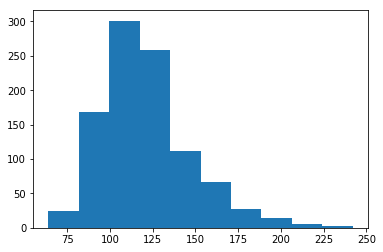

In [74]:
# Answer:
plt.hist(movies['duration'], bins = 10)
plt.show()

#### Use a box plot to display that same data.

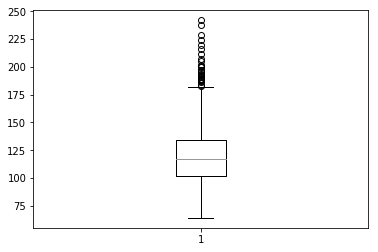

In [75]:
# Answer:
plt.boxplot(movies['duration'])
plt.show()

## Intermediate level

#### Count how many movies have each of the content ratings.

In [76]:
# Answer:
rating_count = movies.groupby('content_rating').size()
sort_rating_count = rating_count.sort_values(ascending = False)
#movies.content_rating.value_counts()
print (sort_rating_count)

content_rating
R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
dtype: int64


#### Use a visualization to display that same data, including a title and x and y labels.

Text(0.5,1,'Number of Movies by Content Rating')

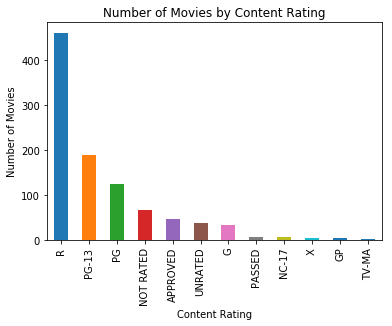

In [77]:
# Answer:

sort_rating_count.plot(kind = 'bar')
plt.xlabel('Content Rating')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Content Rating')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [78]:
# Answer:
movies.content_rating = movies.content_rating.replace("NOT RATED", "UNRATED")
movies.content_rating = movies.content_rating.replace("APPROVED", "UNRATED")
movies.content_rating = movies.content_rating.replace("PASSED", "UNRATED")
movies.content_rating = movies.content_rating.replace("GP", "UNRATED")
movies.content_rating.value_counts()


R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [79]:
# Answer:
movies.content_rating = movies.content_rating.replace("X", "NC-17")
movies.content_rating = movies.content_rating.replace("TV-MA", "NC-17")

movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [80]:
# Answer:
movies.count()
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [81]:
# Answer:

'''Below shows that the the 'Nan' ratings are from Butch Cassidy(genre: 'Biography')
Eagles Dare (genre: 'Action')
True Grit (genre: Adventure)
'''

is_null = movies[movies.isnull().any(axis=1)]
#print(is_null)

#Here, we try to find out the "mode" of each category to replace the NaN values with.
#"Mode" for Biography is 'R', Adventure is 'PG-13', Action is 'R'
genre_count = movies.groupby(['genre']).size()
genre_biography = movies.groupby(['genre','content_rating']).size()
#print(genre_count)
#print(genre_biography)

movies = movies.fillna('R', limit=2)
movies = movies.fillna('PG-13', limit=1)
is_null = movies[movies.isnull().any(axis=1)]
print(is_null)

movies.isnull().sum()

Empty DataFrame
Columns: [star_rating, title, content_rating, genre, duration, actors_list]
Index: []


star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [82]:
# Answer:

# Create variable with TRUE if movies is >= 120
long_movies = movies['duration'] >= 120
#print(long_movies)

# Create variable with TRUE if star_rating is greater than 0
rated_movies = movies['star_rating'] > 0

# Select all cases where movies is > 120 and star_rating is greater than 0
rated_long_movies = movies[long_movies & rated_movies]
#print(rated_long_movies)

avg_rated_long_movies = round((rated_long_movies['star_rating'].sum()/rated_long_movies['star_rating'].count()),2)
print("The average star rating for movies >= 120 mins is " + str(avg_rated_long_movies))

# Create variable with TRUE if movies is < 120
short_movies = movies['duration'] < 120
#print(short_movies)

# Create variable with TRUE if star_rating is greater than 0
rated_movies = movies['star_rating'] > 0

# Select all cases where movies is > 120 and star_rating is greater than 0
rated_short_movies = movies[short_movies & rated_movies]
#print(rated_short_movies)

avg_rated_short_movies = round((rated_short_movies['star_rating'].sum()/rated_short_movies['star_rating'].count()),2)
print("The average star rating for movies >= 120 mins is " + str(avg_rated_short_movies))

print("The length of movies does not affect their star ratings.")

The average star rating for movies >= 120 mins is 7.95
The average star rating for movies >= 120 mins is 7.84
The length of movies does not affect their star ratings.


#### Use a visualization to detect whether there is a relationship between duration and star rating.

There does not seem to have any relationship


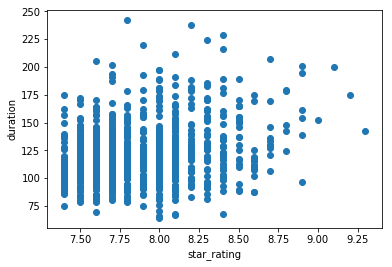

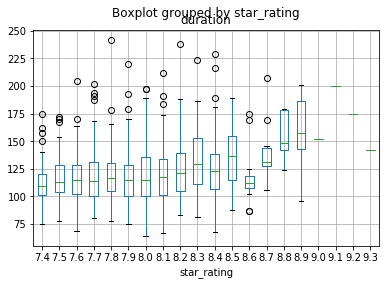

In [83]:
# Answer:

plt.scatter(movies['star_rating'],movies['duration'])
plt.xlabel('star_rating')
plt.ylabel('duration')

movies.boxplot('duration','star_rating')

print("There does not seem to have any relationship")

#### Calculate the average duration for each genre.

In [84]:
# Answer:
genre_duration = round((movies.groupby('genre').duration.mean()),2)
print(genre_duration)

genre
Action       126.49
Adventure    134.84
Animation     96.60
Biography    131.84
Comedy       107.60
Crime        122.30
Drama        126.54
Family       107.50
Fantasy      112.00
Film-Noir     97.33
History       66.00
Horror       102.52
Mystery      115.62
Sci-Fi       109.00
Thriller     114.20
Western      136.67
Name: duration, dtype: float64


## Advanced level

#### Visualize the relationship between content rating and duration.

G rated movies tend to be shorter.


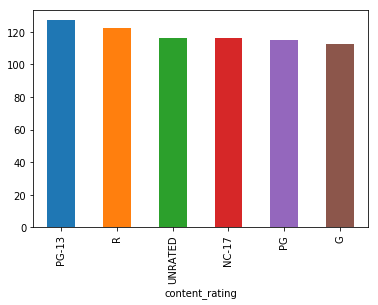

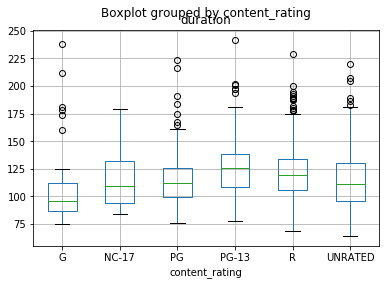

In [85]:
# Answer:
#plt.scatter(movies['content_rating'],movies['duration'])
#plt.scatter(movies['duration'],movies['content_rating'])

content_duration = round((movies.groupby('content_rating').duration.mean()),2)
content_duration = content_duration.sort_values(ascending=False)
#print(content_duration)

content_duration.plot(kind='bar')
movies.boxplot('duration', 'content_rating')

print("G rated movies tend to be shorter.")

#### Determine the top rated movie (by star rating) for each genre.

In [86]:
# Answer:

top_genre_movies = movies.sort_values('star_rating').groupby('genre').max()
print (top_genre_movies)

           star_rating                                title content_rating  \
genre                                                                        
Action             9.0                              Yojimbo        UNRATED   
Adventure          8.9                            True Grit        UNRATED   
Animation          8.6                       Wreck-It Ralph        UNRATED   
Biography          8.9                        Walk the Line        UNRATED   
Comedy             8.6                           Zombieland        UNRATED   
Crime              9.3                               Zodiac        UNRATED   
Drama              8.9                                 Zulu        UNRATED   
Family             7.9  Willy Wonka & the Chocolate Factory             PG   
Fantasy            7.7            The City of Lost Children              R   
Film-Noir          8.3                        The Third Man        UNRATED   
History            8.0                  Battleship Potemkin     

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [87]:
# Answer:

duplicate = movies[movies.duplicated('title', False)]
print(duplicate)

remove_duplicate = duplicate.drop_duplicates(None, 'first')
print(remove_duplicate)

#there are no duplicates as no row is dropped

     star_rating                            title content_rating      genre  \
466          7.9  The Girl with the Dragon Tattoo              R      Crime   
482          7.8  The Girl with the Dragon Tattoo              R      Crime   
662          7.7                        True Grit          PG-13  Adventure   
678          7.7                   Les Miserables          PG-13      Drama   
703          7.6                          Dracula        UNRATED     Horror   
905          7.5                          Dracula              R     Horror   
924          7.5                   Les Miserables          PG-13      Crime   
936          7.4                        True Grit          PG-13  Adventure   

     duration                                        actors_list  
466       158  [u'Daniel Craig', u'Rooney Mara', u'Christophe...  
482       152  [u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...  
662       110  [u'Jeff Bridges', u'Matt Damon', u'Hailee Stei...  
678       158  [u'Hu

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [88]:
# Answer:
'''movies.genre.value_counts()
large_genres = (movies.genre.value_counts()) >= 10
print(large_genres)

top_genres = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']
movies.groupby'''

"movies.genre.value_counts()\nlarge_genres = (movies.genre.value_counts()) >= 10\nprint(large_genres)\n\ntop_genres = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']\nmovies.groupby"

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [89]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [90]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [91]:
# Answer:
genre_rating = movies.groupby('genre').star_rating.agg(['count','mean'])
#print(genre_ratings)

genre_rating.loc[genre_rating['count'] >10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [92]:
#Can we find most popular actors? Actors that act in the most number of films

#Clean up the actor list "u"
